<a href="https://colab.research.google.com/github/AnniaBenitez/Cores_mod2/blob/main/core5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Parte II

### Siguiente paso
1. Preparación del Entorno
    - Asegúrate de tener instalado Pandas en tu entorno de trabajo.
    - Utiliza el archivo retail_sales.csv del proyecto inicial. Si aún no lo tienes, descarga el archivo correspondiente.
2. Cargar los Datos
    - Carga el archivo retail_sales.csv en un DataFrame de Pandas.
    - Muestra las primeras 10 filas del DataFrame para confirmar que los datos se han cargado correctamente.

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [124]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("mohammadtalib786/retail-sales-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/mohammadtalib786/retail-sales-dataset/versions/1


In [125]:
file_path = os.path.join(path, 'retail_sales_dataset.csv')
datos = pd.read_csv(file_path)
df = pd.DataFrame(datos)
df.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


3. Exploración Inicial de los Datos
    - Muestra las últimas 5 filas del DataFrame.
    - Utiliza el método info() para obtener información general sobre el DataFrame, incluyendo el número de entradas, nombres de las columnas, tipos de datos y memoria utilizada.
    - Genera estadísticas descriptivas del DataFrame utilizando el método describe().

In [126]:
print('\nÚltimas 5 filas del dataframe:')
print(df.tail(5))


Últimas 5 filas del dataframe:
     Transaction ID        Date Customer ID  Gender  Age Product Category  \
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount  
995         1              50            50  
996         3              30            90  
997         4              25           100  
998         3              50           150  
999         4              30           120  


In [127]:
print('\nInfo general del dataframe:')
print(df.info())


Info general del dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None


In [128]:
print('\nEstadísticas descriptivas del dataframe:')
print(df.describe())


Estadísticas descriptivas del dataframe:
       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000


4. Inspección de los Datos
    - Inspecciona los tipos de datos de cada columna utilizando el atributo dtypes.
    - Cuenta los valores únicos en la columna Producto utilizando el método value_counts().
    - Muestra todos los valores únicos en la columna Tienda utilizando el método unique().

In [129]:
print('Tipos de datos de cada columna del dataframe:')
print(df.dtypes)

Tipos de datos de cada columna del dataframe:
Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object


In [130]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.drop('Customer ID', axis=1)

In [131]:
print('Conteo de Valores unicos de cada columna del dataframe:')
print(df.value_counts(['Product Category']))

Conteo de Valores unicos de cada columna del dataframe:
Product Category
Clothing            351
Electronics         342
Beauty              307
Name: count, dtype: int64


In [132]:
#en este estoy confundida, no hay columna tienda por lo que usaré otra
print('Conteo de Valores unicos de cada columna del dataframe:')
print(df['Gender'].unique())
print(df['Product Category'].unique())

Conteo de Valores unicos de cada columna del dataframe:
['Male' 'Female']
['Beauty' 'Clothing' 'Electronics']


5. Filtrado de Datos
    - Filtra el DataFrame para mostrar solo las filas donde las ventas (Ventas) sean mayores a 50.
    - Filtra el DataFrame para mostrar solo las filas donde el precio (Precio) sea menor a 0.5.
    - Utilizando el método query(), filtra el DataFrame para mostrar las filas donde el producto sea Manzanas y las ventas sean mayores a 30.

## Carga y Exploración Inicial de Datos:
- Cargar el dataset y revisar su estructura básica.
- Describir las variables y su distribución.
- Identificar y tratar valores nulos y outliers.

In [133]:
print("Cantidades mayores a 50:")
print(df[df['Quantity'] > 50])

Cantidades mayores a 50:
Empty DataFrame
Columns: [Transaction ID, Date, Gender, Age, Product Category, Quantity, Price per Unit, Total Amount]
Index: []


In [134]:
print('Precios menores a 0.5')
print(df[df['Price per Unit'] < 500]) #0.5 es en millones por lo que cambiaré a 500

Precios menores a 0.5
     Transaction ID       Date  Gender  Age Product Category  Quantity  \
0                 1 2023-11-24    Male   34           Beauty         3   
2                 3 2023-01-13    Male   50      Electronics         1   
4                 5 2023-05-06    Male   30           Beauty         2   
5                 6 2023-04-25  Female   45           Beauty         1   
6                 7 2023-03-13    Male   46         Clothing         2   
..              ...        ...     ...  ...              ...       ...   
995             996 2023-05-16    Male   62         Clothing         1   
996             997 2023-11-17    Male   52           Beauty         3   
997             998 2023-10-29  Female   23           Beauty         4   
998             999 2023-12-05  Female   36      Electronics         3   
999            1000 2023-04-12    Male   47      Electronics         4   

     Price per Unit  Total Amount  
0                50           150  
2                

In [135]:
# Cambiar a electrónicos con cantidades mayores a 3
print('Electrónicos con cantidades mayores a 3:')
print(df.query('Quantity > 3 and `Product Category` == "Electronics"'))

Electrónicos con cantidades mayores a 3:
     Transaction ID       Date  Gender  Age Product Category  Quantity  \
7                 8 2023-02-22    Male   30      Electronics         4   
14               15 2023-01-16  Female   42      Electronics         4   
30               31 2023-05-23    Male   44      Electronics         4   
45               46 2023-06-26  Female   20      Electronics         4   
64               65 2023-12-05    Male   51      Electronics         4   
..              ...        ...     ...  ...              ...       ...   
945             946 2023-05-08    Male   62      Electronics         4   
956             957 2023-08-15  Female   60      Electronics         4   
969             970 2023-05-16    Male   59      Electronics         4   
970             971 2023-12-05  Female   27      Electronics         4   
999            1000 2023-04-12    Male   47      Electronics         4   

     Price per Unit  Total Amount  
7                25           100 

6. Slicing de Datos
    - Selecciona y muestra solo las columnas Producto y Ventas del DataFrame.
    - Utilizando loc[], selecciona y muestra las filas de la 5 a la 10 (inclusive) y las columnas Producto y Tienda.
    - Utilizando iloc[], selecciona y muestra las primeras 5 filas y las primeras 3 columnas del DataFrame.

In [136]:
df.loc[ :, ['Product Category', 'Quantity']]

,Product Category,Quantity
0,Beauty,3
1,Clothing,2
2,Electronics,1
3,Clothing,1
4,Beauty,2
...,...,...
995,Clothing,1
996,Beauty,3
997,Beauty,4
998,Electronics,3


In [137]:
df.loc[5:10, ['Product Category', 'Quantity']]

,Product Category,Quantity
5,Beauty,1
6,Clothing,2
7,Electronics,4
8,Electronics,2
9,Clothing,4
10,Clothing,2


In [138]:
df.iloc[0:5 , 0:3]

,Transaction ID,Date,Gender
0,1,2023-11-24,Male
1,2,2023-02-27,Female
2,3,2023-01-13,Male
3,4,2023-05-21,Male
4,5,2023-05-06,Male


In [139]:
nulos = df.isnull().sum()
nulos

,0
Transaction ID,0
Date,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [140]:
# Descomponer la fecha en componentes
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Ahora puedes usar estas nuevas características
df = df.drop(['Date'], axis=1)


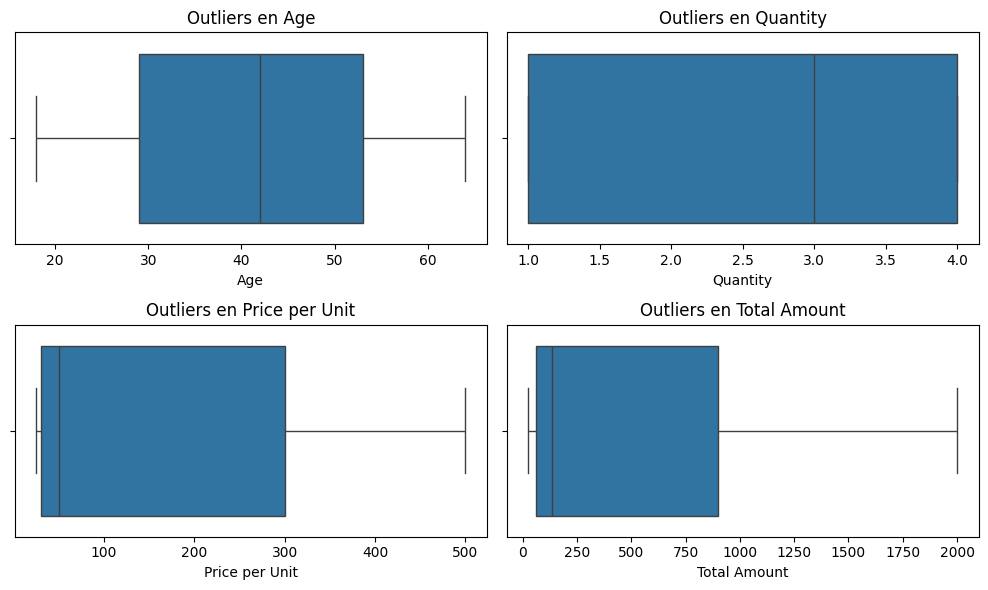

In [141]:
# Lista de columnas numéricas
numerical_columns = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear un boxplot para cada columna numérica
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)  # Subplot 2x2
    sns.boxplot(x=df[column])
    plt.title(f'Outliers en {column}')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

sin outliers ni nulos

## Análisis de Correlación:
Realizar un análisis de correlación y crear un mapa de calor para visualizar las relaciones entre las variables.

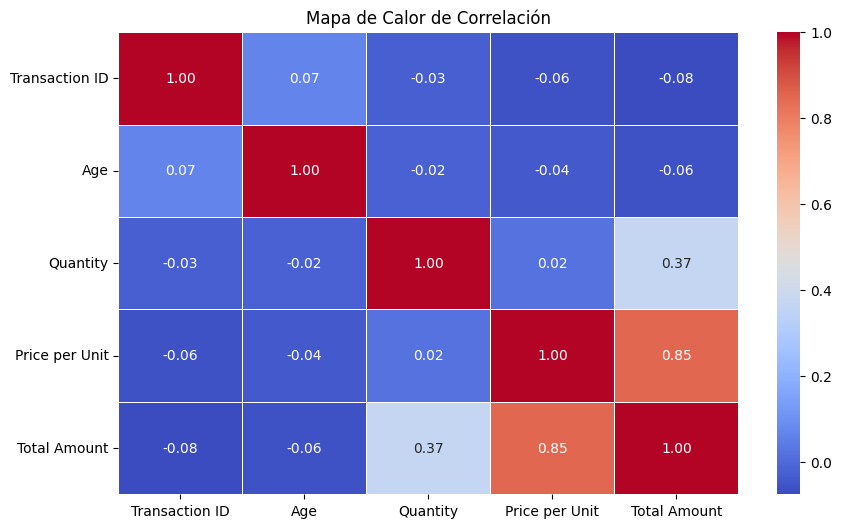

In [142]:
# Seleccionar solo las columnas numéricas
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación solo con columnas numéricas
correlation_matrix = numerical_df.corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear el mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

# Agregar título
plt.title('Mapa de Calor de Correlación')

# Mostrar el gráfico
plt.show()


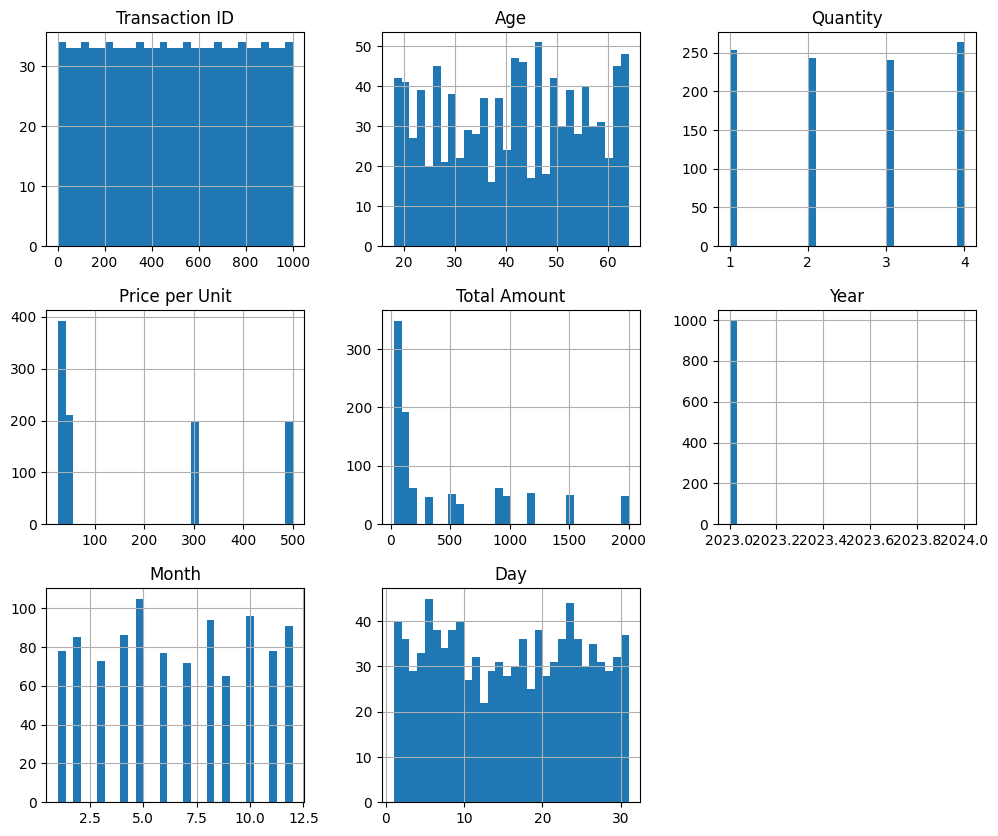

In [143]:
df.hist(bins=30, figsize=(12, 10))
plt.show()

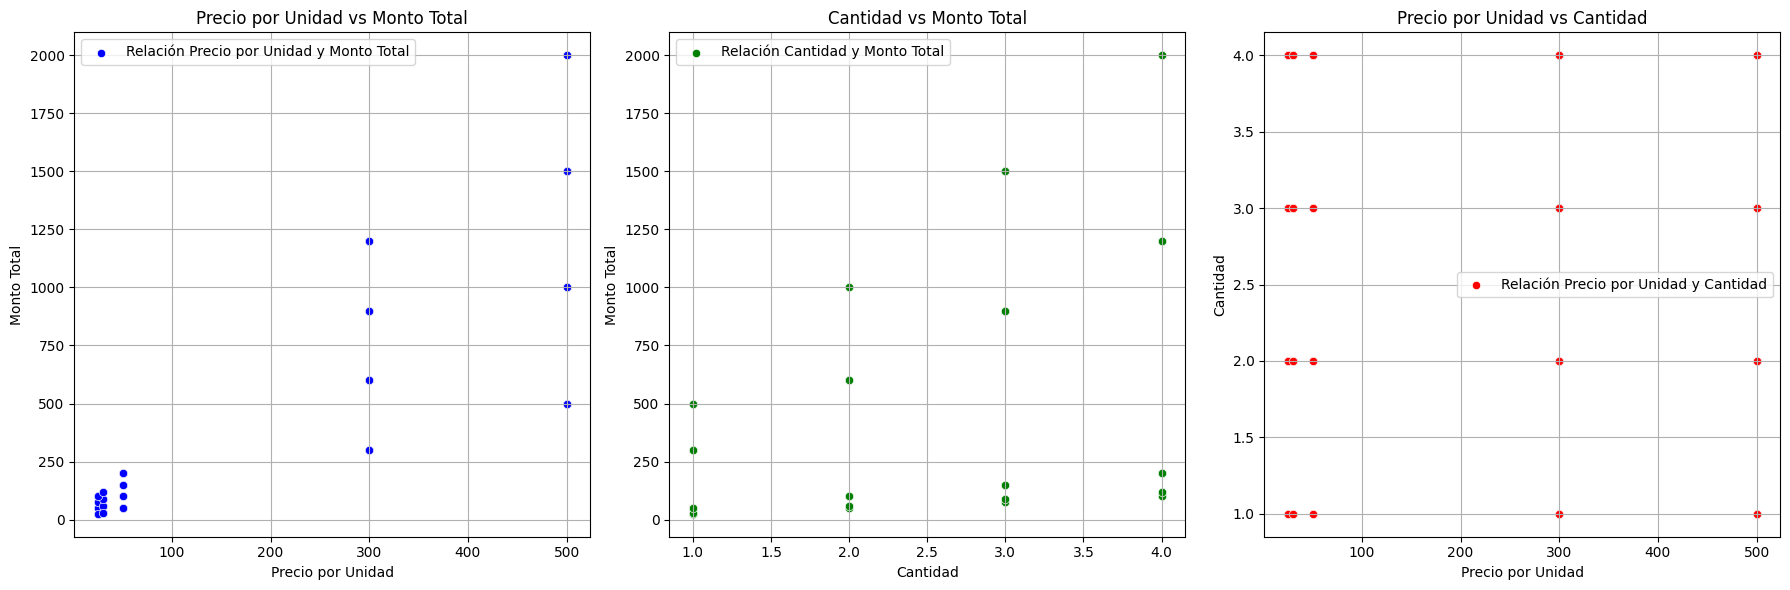

In [144]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot entre Precio por Unidad y Monto Total
sns.scatterplot(ax=axes[0], x='Price per Unit', y='Total Amount', data=df, color='blue')
axes[0].set_title('Precio por Unidad vs Monto Total')
axes[0].set_xlabel('Precio por Unidad')
axes[0].set_ylabel('Monto Total')

# Añadir cuadrícula y leyenda
axes[0].grid(True)
axes[0].legend(['Relación Precio por Unidad y Monto Total'])

# Scatter plot entre Cantidad y Monto Total
sns.scatterplot(ax=axes[1], x='Quantity', y='Total Amount', data=df, color='green')
axes[1].set_title('Cantidad vs Monto Total')
axes[1].set_xlabel('Cantidad')
axes[1].set_ylabel('Monto Total')

# Añadir cuadrícula y leyenda
axes[1].grid(True)
axes[1].legend(['Relación Cantidad y Monto Total'])

# Scatter plot entre Precio por Unidad y Cantidad
sns.scatterplot(ax=axes[2], x='Price per Unit', y='Quantity', data=df, color='red')
axes[2].set_title('Precio por Unidad vs Cantidad')
axes[2].set_xlabel('Precio por Unidad')
axes[2].set_ylabel('Cantidad')

# Añadir cuadrícula y leyenda
axes[2].grid(True)
axes[2].legend(['Relación Precio por Unidad y Cantidad'])

# Mejorar el layout para evitar solapamiento de títulos y etiquetas
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [149]:
# Columnas categóricas
categorical_columns = ['Gender', 'Product Category']  # Ajusta según tus columnas

# Columnas numéricas
numerical_columns = ['Age', 'Quantity', 'Price per Unit']

# Definir las transformaciones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Escalado de columnas numéricas
        ('cat', OneHotEncoder(), categorical_columns)   # Codificación de columnas categóricas
    ])

# Crear el pipeline con regresión lineal
pipeline_linear = Pipeline(steps=[
    ('preprocessor', preprocessor),             # Paso de preprocesamiento
    ('regressor', LinearRegression())           # Modelo de regresión lineal
])

# Separar el conjunto de datos en características (X) y etiquetas (y)
X = df.drop('Total Amount', axis=1)  # 'Target' es la columna de etiquetas a predecir
y = df['Total Amount']  # Ajusta según el nombre de tu columna objetivo

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el pipeline con los datos de entrenamiento
pipeline_linear.fit(X_train, y_train)

# Predicción
y_pred_linear = pipeline_linear.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Evaluación con métricas de regresión
mse = mean_squared_error(y_test, y_pred_linear)
rmse = mean_squared_error(y_test, y_pred_linear, squared=False)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred_linear)
r2 = r2_score(y_test, y_pred_linear)

print(f"Regresión Lineal - MSE: {mse}, RMSE: {rmse}, MAE: {mae}, R2: {r2}")


Regresión Lineal - MSE: 42172.77, RMSE: 205.36009836382527, MAE: 173.51, R2: 0.8559324734230679


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [152]:
# Definir las columnas categóricas y numéricas
categorical_columns = ['Gender', 'Product Category']  # Ajusta según tus columnas
numerical_columns = ['Age', 'Quantity', 'Price per Unit']  # Ajusta según tus columnas

# Definir el preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Escalado de columnas numéricas
        ('cat', OneHotEncoder(), categorical_columns)   # Codificación de columnas categóricas
    ])

# Crear el pipeline con el clasificador KNN
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),           # Paso de preprocesamiento
    ('classifier', KNeighborsClassifier(n_neighbors=5))  # Modelo KNN
])

# Separar el conjunto de datos en características (X) y etiquetas (y)
X = df.drop('Total Amount', axis=1)  # Ajusta el nombre de la columna objetivo
y = df['Total Amount']  # Ajusta según tu columna objetivo

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el pipeline con los datos de entrenamiento
pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred_knn = pipeline.predict(X_test)



In [154]:
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN'],
    'Accuracy': [accuracy_linear, accuracy_knn],
})

print(comparison)


               Model  Accuracy
0  Linear Regression      0.00
1                KNN      0.47
